In [1]:
#tagged word part of speech POS helps in understandning where and what is the word meaning
#for exmalpe 
import nltk
nltk.download('nps_chat')
print(nltk.corpus.nps_chat.tagged_words())

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.
[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


if the corpus segmented into sentence it will have a **tagged_sents()**

In [2]:
#lets see which of these tags are the most common
from nltk.corpus import brown
nltk.download('brown')
nltk.download('universal_tagset')
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)
print(tag_fd.items())

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
dict_items([('DET', 11389), ('NOUN', 30654), ('ADJ', 6706), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('ADV', 3349), ('CONJ', 2717), ('PRT', 2264), ('PRON', 2535), ('NUM', 2166), ('X', 92)])


In [3]:
#lets see what POS occur before a noun
word_tag_pairs = nltk.bigrams(brown_news_tagged)
print(list(nltk.FreqDist(a[1] for (a,b) in word_tag_pairs if b[1]=='NOUN').items()))

[('DET', 7373), ('NOUN', 7959), ('ADJ', 4761), ('VERB', 1842), ('ADP', 3781), ('CONJ', 938), ('.', 2796), ('NUM', 894), ('ADV', 186), ('PRT', 94), ('X', 11), ('PRON', 19)]


In [6]:
#let's do the same to verbs
nltk.download('treebank')
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([word for (word,_) in word_tag_fd.most_common() if word[1] == 'VERB'])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[('is', 'VERB'), ('said', 'VERB'), ('was', 'VERB'), ('are', 'VERB'), ('be', 'VERB'), ('has', 'VERB'), ('have', 'VERB'), ('will', 'VERB'), ('says', 'VERB'), ('would', 'VERB'), ('were', 'VERB'), ('had', 'VERB'), ('been', 'VERB'), ('could', 'VERB'), ("'s", 'VERB'), ('can', 'VERB'), ('do', 'VERB'), ('say', 'VERB'), ('make', 'VERB'), ('may', 'VERB'), ('did', 'VERB'), ('rose', 'VERB'), ('made', 'VERB'), ('does', 'VERB'), ('expected', 'VERB'), ('buy', 'VERB'), ('take', 'VERB'), ('get', 'VERB'), ('might', 'VERB'), ('sell', 'VERB'), ('added', 'VERB'), ('sold', 'VERB'), ('help', 'VERB'), ('including', 'VERB'), ('should', 'VERB'), ('reported', 'VERB'), ('according', 'VERB'), ('pay', 'VERB'), ('compared', 'VERB'), ('being', 'VERB'), ('fell', 'VERB'), ('began', 'VERB'), ('based', 'VERB'), ('used', 'VERB'), ('closed', 'VERB'), ("'re", 'VERB'), ('want', 'VERB'), ('see', 'VERB'), ('took

In [14]:
#let's find what is the most POS come after 'often'
brown_lrnd_tagged = nltk.corpus.brown.tagged_words(categories='learned',tagset='universal')
tags = [b[1] for (a,b) in nltk.bigrams(brown_lrnd_tagged) if a[0]=='often']
fd = nltk.FreqDist(tags)
fd.tabulate() 

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


noun never appears :"

In [16]:
#little revision on dict, i liked this function
nltk.download('words')
last_letters = nltk.defaultdict(list)
words = nltk.corpus.words.words('en')
for w in words:
  key = w[-2:]
  last_letters[key].append(w)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [18]:
print(last_letters['za'])

['Adeliza', 'Agromyza', 'alcarraza', 'Antholyza', 'Balsamorrhiza', 'balza', 'bonanza', 'boza', 'braza', 'Briza', 'cachaza', 'cadenza', 'calabaza', 'caza', 'chalaza', 'coleorhiza', 'colza', 'Corallorhiza', 'coryza', 'credenza', 'Cunza', 'Cyanospiza', 'czaritza', 'dactylorhiza', 'Daza', 'Eliza', 'Emberiza', 'extravaganza', 'ganza', 'Geissorhiza', 'Geospiza', 'Glycyrrhiza', 'granza', 'guaza', 'guereza', 'hamza', 'huzza', 'hydrorhiza', 'influenza', 'Itza', 'Jateorhiza', 'Juza', 'kouza', 'Lespedeza', 'Liza', 'matanza', 'maza', 'Melospiza', 'mestiza', 'mirza', 'murza', 'mycorhiza', 'neoza', 'nyanza', 'onza', 'Oryza', 'Osmorhiza', 'Peziza', 'piazza', 'picrorhiza', 'pileorhiza', 'pizza', 'plaza', 'pseudoinfluenza', 'Pseudopeziza', 'Pyrenopeziza', 'rhodorhiza', 'romanza', 'Saccorhiza', 'shinza', 'Speranza', 'stanza', 'tiza', 'tristeza', 'tsaritza', 'tuza', 'tzaritza', 'Xanthorrhiza', 'yaguaza', 'za', 'Zanthorrhiza', 'zuza']


In [19]:
#and this one 
pos = nltk.defaultdict(lambda: nltk.defaultdict(int))
brown_news_tagged = nltk.corpus.brown.tagged_words(categories="news",tagset="universal")
for ((w1,t1),(w2,t2)) in nltk.bigrams(brown_news_tagged):
  pos[(t1,w2)][t2] += 1
print(pos[('ADV','right')]) 

defaultdict(<class 'int'>, {'ADV': 3, 'ADJ': 1})


**automatic tagging ?**

In [0]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [27]:
tags = [tag for (word,tag) in brown.tagged_words(categories='news')]
print(nltk.FreqDist(tags).max())

NN


In [28]:
nltk.download('punkt')
raw ='I do not like green eggs and ham, I do not like them Sam I am!' 
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]


In [29]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

unsurprisingly, this method performs rather poorly

In [0]:
#maybe a regular expression tagger would work ?
patterns = [
            (r'.*ing$','VBG'),                # gerunds 
            (r'.*ed$','VBD'),                 # simple past 
            (r'.*es$', 'VNZ'),                # 3rd singular present 
            (r'.*ould$', 'MD'),               # modals 
            (r'.*\'s$','NN$'),                # possessive nouns
            (r'.*s$', 'NNS'),                 # plural nouns
            (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers 
            (r'.*', 'NN')                     # nouns (default) 
]

In [31]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.evaluate(brown_tagged_sents)

0.20131471647075203

In [33]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = list(fd.keys())[:100]
likely_tags = dict((word,cfd[word].max())for word in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags,backoff=nltk.DefaultTagger('NN'))
baseline_tagger.evaluate(brown_tagged_sents)

0.46063806511923944

almost 50%  with simply knowing the tags for the 100 most freguent words

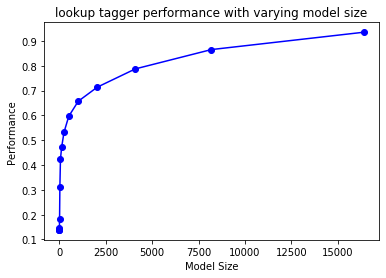

In [42]:
def performance(cfd,wordlist):
  lt = dict((word,cfd[word].max())for word in wordlist)
  baseline_tagger = nltk.UnigramTagger(model=lt,backoff=nltk.DefaultTagger('NN'))
  return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))
def display():
  import pylab
  words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
  cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
  size = 2**pylab.arange(15)
  prefs = [performance(cfd,words_by_freq[:size])for size in size]
  pylab.plot(size,prefs,'-bo')
  pylab.title('lookup tagger performance with varying model size')
  pylab.xlabel('Model Size')
  pylab.ylabel('Performance')
  pylab.show()
display()

In [45]:
#training and text
size = int(len(brown_tagged_sents) * 0.9)
print(size)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

4160


0.8121200039868434

In [48]:
#why unigramTagger , aint we suppose to take care of the word in its sentence as well ?
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))
bigram_tagger.evaluate(test_sents)

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


0.10206319146815508

Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word , it is unable to assign a tag. It cannot tag the following word (i.e., million), even if it was seen during training, simply because it never saw it during training with a None tag on the previous word. Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low

why not combine **both of them**

In [51]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

how to determine the class of the word -> by its morphological, syntactic, and semantic 